# 0. Install and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\861p3\AppData\Local\Temp\pip-install-lh0jxi6f\tensorflow-gpu_a99999e31dd241f8825e52375ab6f015\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not buil


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached python_version-0.0.2-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


In [2]:
!pip list

Package                      Version
---------------------------- --------------------
absl-py                      2.0.0
anyio                        4.0.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.4.0
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
cachetools                   5.3.1
certifi                      2023.7.22
cffi                         1.15.1
charset-normalizer           3.2.0
cloudpickle                  2.2.1
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
defusedxml                   0.7.1
distlib                    

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 1. Load Data

In [30]:
import numpy as np
from matplotlib import pyplot as plt

In [31]:
data_train = tf.keras.utils.image_dataset_from_directory('dataset/train')
data_test = tf.keras.utils.image_dataset_from_directory('dataset/test')

Found 560 files belonging to 2 classes.
Found 120 files belonging to 2 classes.


In [32]:
data_iterator = data_train.as_numpy_iterator()

In [33]:
batch = data_iterator.next()

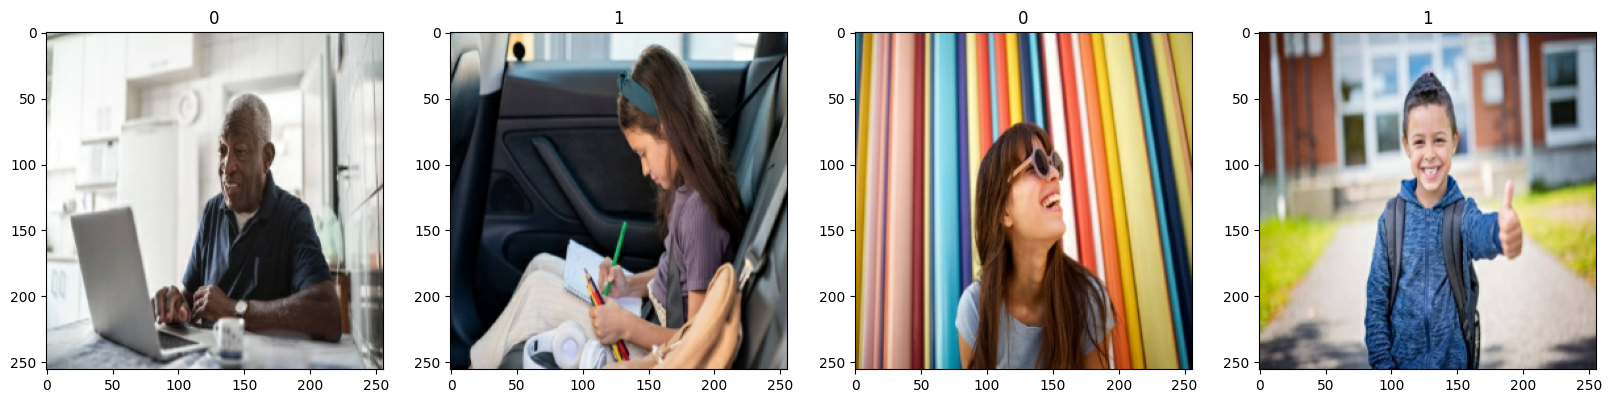

In [34]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Scale Data

In [35]:
data_train = data_train.map(lambda x,y: (x/255, y))
data_test = data_test.map(lambda x,y: (x/255, y))

In [36]:
data_train.as_numpy_iterator().next()

(array([[[[0.50942093, 0.43491116, 0.41138175],
          [0.5060451 , 0.4315353 , 0.4080059 ],
          [0.5019608 , 0.42745098, 0.40347734],
          ...,
          [0.2260723 , 0.24701287, 0.25882354],
          [0.2014725 , 0.2367513 , 0.24981809],
          [0.18905868, 0.23829274, 0.26007584]],
 
         [[0.5128523 , 0.4383425 , 0.4148131 ],
          [0.50718445, 0.43267465, 0.4091452 ],
          [0.5034314 , 0.42892158, 0.4049479 ],
          ...,
          [0.25353286, 0.277248  , 0.29543123],
          [0.22384153, 0.25716147, 0.27366346],
          [0.2287052 , 0.2749981 , 0.2948223 ]],
 
         [[0.5153033 , 0.4407935 , 0.4172641 ],
          [0.5096354 , 0.43512562, 0.4115962 ],
          [0.5080557 , 0.4335459 , 0.4095722 ],
          ...,
          [0.24729052, 0.27997664, 0.3101371 ],
          [0.21650773, 0.24983723, 0.27532935],
          [0.21726409, 0.258655  , 0.2801164 ]],
 
         ...,
 
         [[0.42227712, 0.33453393, 0.27554572],
          [0.42926

# 3. Split Data

In [37]:
train_size = int(len(data_train)*.8)
val_size = int(len(data_train)*.2)

In [38]:
train_size

14

In [39]:
train = data_train.take(train_size)
val = data_train.skip(train_size).take(val_size)
test = data_test

# 4. Build Model

In [40]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

# 5. Train

In [46]:
logdir='logs'

In [47]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [48]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
14/14 [==============================] - 21s 1s/step - loss: 0.8543 - accuracy: 0.5201 - val_loss: 0.6817 - val_accuracy: 0.5521
Epoch 2/20
14/14 [==============================] - 15s 997ms/step - loss: 0.6711 - accuracy: 0.5714 - val_loss: 0.6611 - val_accuracy: 0.6250
Epoch 3/20
14/14 [==============================] - 19s 1s/step - loss: 0.6778 - accuracy: 0.5982 - val_loss: 0.6594 - val_accuracy: 0.7292
Epoch 4/20
14/14 [==============================] - 22s 1s/step - loss: 0.6584 - accuracy: 0.6473 - val_loss: 0.6366 - val_accuracy: 0.7917
Epoch 5/20
14/14 [==============================] - 15s 1s/step - loss: 0.6237 - accuracy: 0.6741 - val_loss: 0.5592 - val_accuracy: 0.8021
Epoch 6/20
14/14 [==============================] - 19s 1s/step - loss: 0.5310 - accuracy: 0.7299 - val_loss: 0.5202 - val_accuracy: 0.7708
Epoch 7/20
14/14 [==============================] - 19s 1s/step - loss: 0.4721 - accuracy: 0.7902 - val_loss: 0.3536 - val_accuracy: 0.9062
Epoch 8/20
14/14 

# 6. Plot Performance

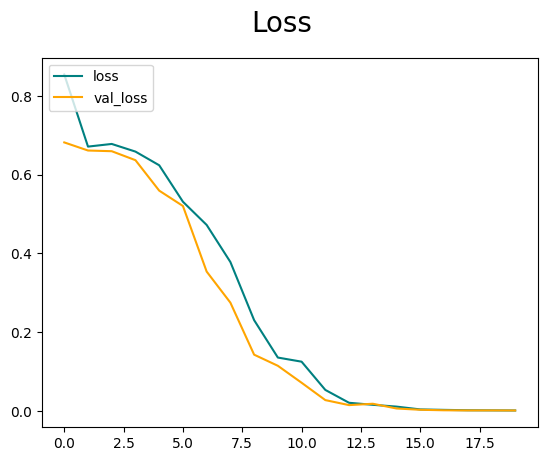

In [49]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

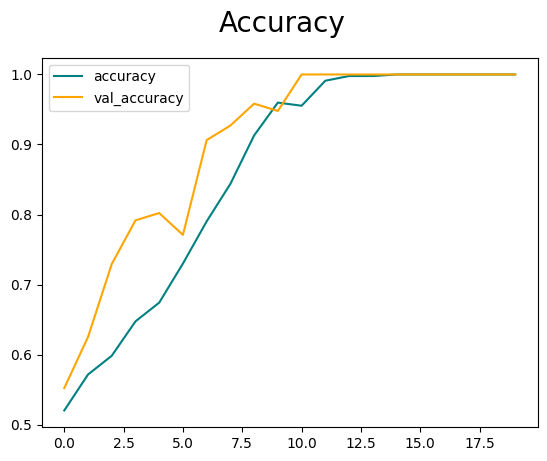

In [50]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 7. Evaluate

In [51]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [54]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [55]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 258ms/step


In [57]:
print('Precision:', pre.result().numpy())
print('Recall:', re.result().numpy())
print('Accuracy:', acc.result().numpy())

Precision: 0.59615386
Recall: 0.51666665
Accuracy: 0.5833333
